In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno

In [2]:
tt_df = pd.read_csv("gender.csv")

In [3]:
tt_df.columns

Index(['Unnamed: 0', 'category', 'sub_category', 'sub_sub_category', 'title',
       'description', 'gender'],
      dtype='object')

In [4]:
ttdf = tt_df.iloc[:,1:7]

In [5]:
text_df = ttdf.loc[:,['title','description','gender']]


In [6]:
print("ALl title and desciption:", len(text_df))
print("Title nulls:", len(text_df[(text_df.title.isnull())]))
print("Description nulls:", len(text_df[text_df.description.isnull()]))
print("Both nulls:", len(text_df[(text_df.title.isnull()) & (text_df.description.isnull())]))
# checking wheter gender also None the
print("Three nulls:", len(text_df[(text_df.title.isnull()) & (text_df.description.isnull()) & (text_df['gender']== 'None')]))
# so in 193 all three have NULL, NULL and None we can ignore all of these values
 

ALl title and desciption: 8773
Title nulls: 1931
Description nulls: 1317
Both nulls: 738
Three nulls: 193


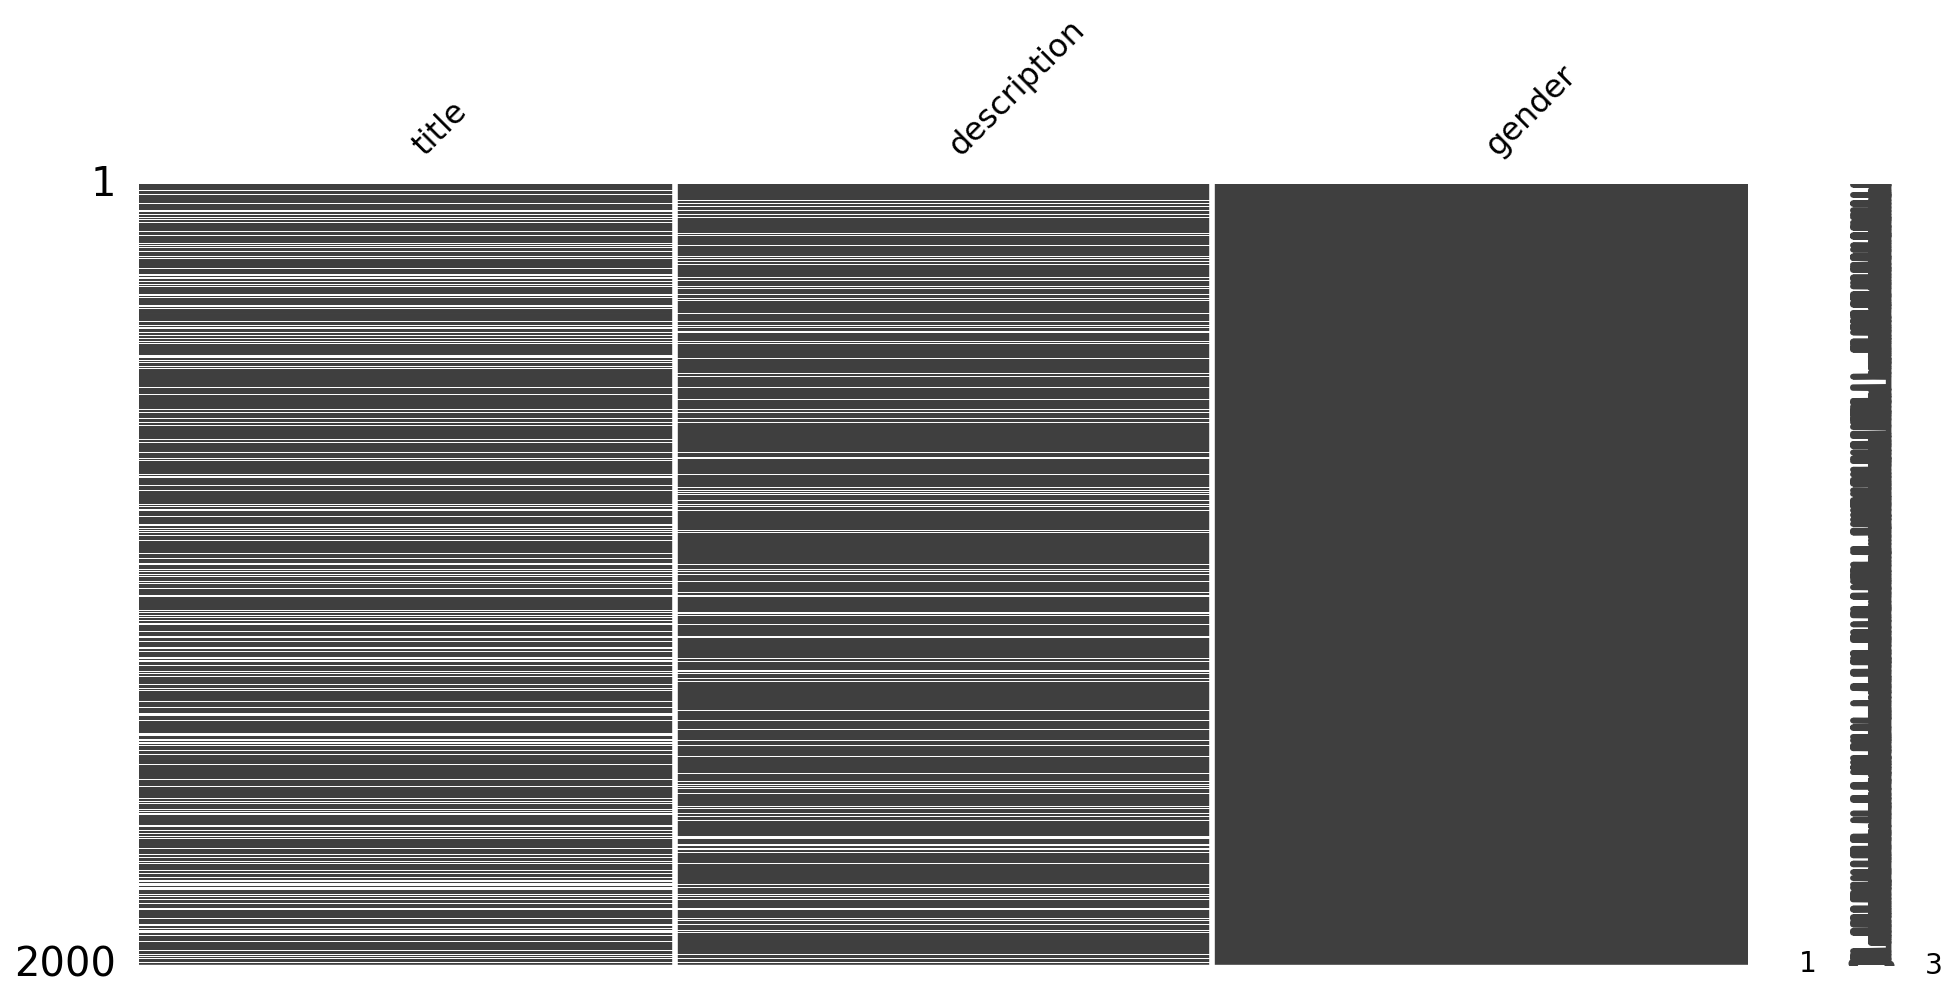

In [7]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
msno.matrix(text_df.sample(2000),
            figsize=(16, 7),
            width_ratios=(15, 1))

In [8]:
from sklearn.cross_validation import train_test_split

train_text_df, test_text_df = train_test_split(text_df, test_size=0.2)

In [9]:
train_text_df.shape

(7018, 3)

In [10]:
test_text_df.shape


(1755, 3)

In [11]:
# lets start working on the test_text_df
title_df = train_text_df.loc[:,['title','gender']]
title_df.shape

(7018, 2)

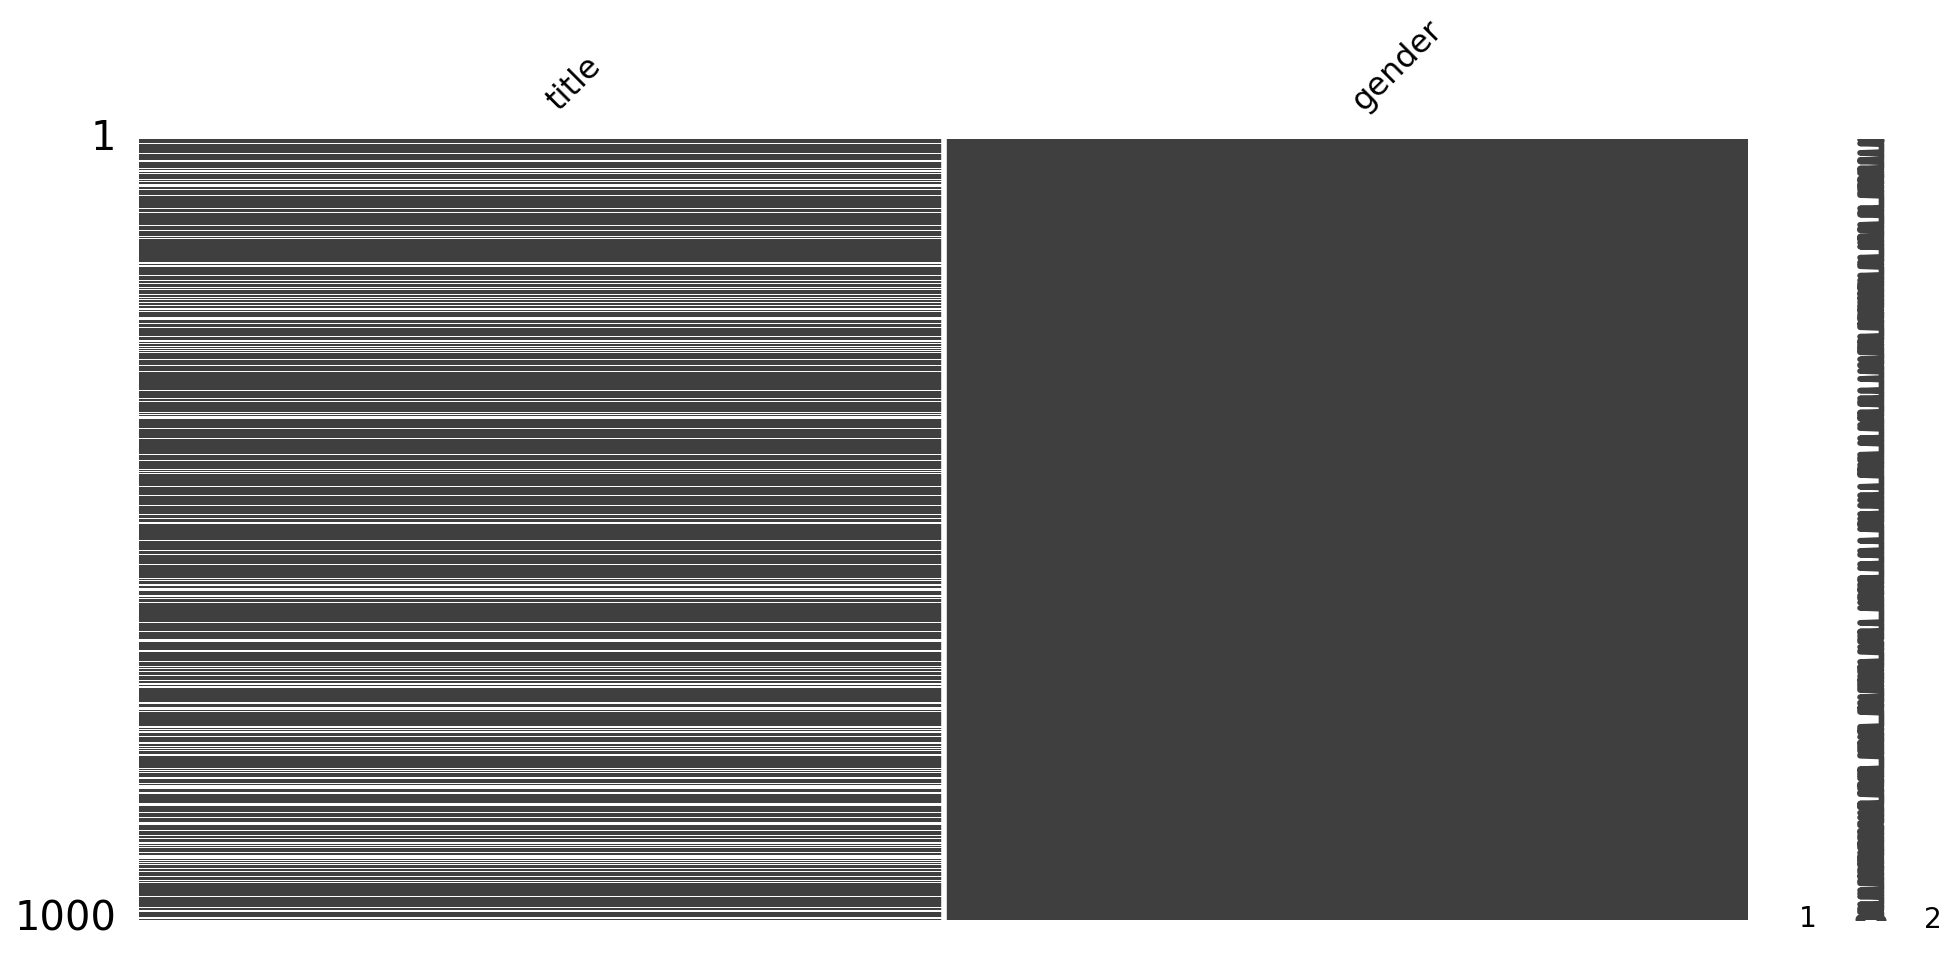

In [12]:
# checking for number of nulls
msno.matrix(title_df.sample(1000),
            figsize=(16, 7),
            width_ratios=(15, 1))

In [13]:
print("ALl title and gender:", len(title_df))
print("Title nulls:", len(title_df[(title_df.title.isnull())]))
print("Gender nulls:", len(title_df[title_df['gender'] == 'None']))
print("Both nulls:", len(title_df[(title_df.title.isnull()) & (title_df['gender']== 'None')]))



ALl title and gender: 7018
Title nulls: 1547
Gender nulls: 1403
Both nulls: 401


In [14]:
# remove where NULL in title
title_df = title_df[title_df.title.notnull()]
#players = players[players.rater1.notnull()]

In [15]:
title_df.shape

(5471, 2)

In [16]:
# lets implement split and machine learning on title
t1 = title_df
t1.gender.value_counts()

unisex            2583
womens            1110
None              1002
mens               557
baby & toddler      68
plus size           42
kids                39
girls               38
boys                30
baby girls           2
Name: gender, dtype: int64

In [17]:
t1['label_num']= t1.gender.map({'unisex':0, 'womens':1,'None':2,'mens':3,'baby & toddler':4,'plus size':5,'girls':6,
                               'kids':7,'boys':8,'baby girls':9})

In [18]:
t1.head()

,title,gender,label_num
7609,Designs by FMC Silver Hammered Hoop Earrings,unisex,0
5985,Tony Cingrani Cincinnati Reds Majestic Officia...,None,2
8534,Wacoal Body by Soft Cup Bra,womens,1
4588,Ricoh Type 1013 Drum,None,2
5485,Calvin Klein Classic Shirtail Hem Tee,womens,1


In [19]:
title_df = t1

In [20]:
print('Relationship between title and gender')

Relationship between title and gender


In [21]:
title_df.shape

(5471, 3)

In [22]:
title_X = title_df.title
title_y = title_df.label_num

In [23]:
print(title_X.shape)
print(title_y.shape)

(5471,)
(5471,)


In [24]:
# split the data set into test and training set
X_train, X_test, y_train, y_test = train_test_split(title_X, title_y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4103,)
(1368,)
(4103,)
(1368,)


In [25]:
#Vectoziing the data set
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()

In [26]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [27]:
X_train_dtm = vect.fit_transform(X_train)# for the training set

In [28]:
X_train_dtm

<4103x5544 sparse matrix of type '<class 'numpy.int64'>'
	with 33905 stored elements in Compressed Sparse Row format>

In [29]:
X_test_dtm = vect.transform(X_test) # for the test set
X_test_dtm

<1368x5544 sparse matrix of type '<class 'numpy.int64'>'
	with 10230 stored elements in Compressed Sparse Row format>

In [30]:
# # BULIDING the model
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [31]:
%time nb.fit(X_train_dtm, y_train)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 59.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [33]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.66081871345029242

In [34]:
print(" MOdel accuracy: 66%")

 MOdel accuracy: 68%


In [35]:
y_pred_class

array([3, 2, 0, ..., 0, 0, 0])

In [72]:
print('Title Model Accuracy: 66%')

Title Model Accuracy: 66%


## Description vs gender

In [37]:
description_df = text_df.loc[:,['description','gender']]

In [38]:
description_df.shape

(8773, 2)

In [39]:
description_df = description_df[description_df.description.notnull()]# all null are removed

In [40]:
description_df.shape# better data set

(7456, 2)

In [41]:
df = description_df[~(description_df['gender'] == "None") ]
df.shape

(5969, 2)

In [42]:
print(len(df[~(description_df['description'] == "None")]))
df.head()

5969


,description,gender
0,Featured in navy oxford Button down point c...,mens
1,"Every time you step on to the field, you turn ...",unisex
2,"How to stencil a T-shirt? Print the stencil, c...",unisex
3,"""EXCLUSIVELY OURS Essential plush cashmere cr...",womens
4,Proudly put your allegiance to the Kansas City...,unisex


In [43]:
description_df = df

In [44]:
description_df['label_num']= description_df.gender.map({'unisex':0, 'womens':1,'None':2,'mens':3,'baby & toddler':4,'plus size':5,'girls':6,
                               'kids':7,'boys':8,'baby girls':9})

In [45]:
description_df.head()

,description,gender,label_num
0,Featured in navy oxford Button down point c...,mens,3.0
1,"Every time you step on to the field, you turn ...",unisex,0.0
2,"How to stencil a T-shirt? Print the stencil, c...",unisex,0.0
3,"""EXCLUSIVELY OURS Essential plush cashmere cr...",womens,1.0
4,Proudly put your allegiance to the Kansas City...,unisex,0.0


In [46]:
len(description_df[description_df['description'] == 'None'])

0

In [47]:
description_X = description_df.description
description_y = description_df.label_num
print(description_X.shape)
print(description_y.shape)

(5969,)
(5969,)


In [48]:
# split the data set into test and training set
description_X_train, description_X_test, description_y_train, description_y_test = train_test_split(description_X, description_y, random_state=1)
print(description_X_train.shape)
print( description_X_test.shape)
print(description_y_train.shape)
print(description_y_test.shape)

(4476,)
(1493,)
(4476,)
(1493,)


In [49]:
#Vectoziing the data set
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect1 = CountVectorizer()


In [50]:
# learn training data vocabulary, then use it to create a document-term matrix
#vect1.fit(description_X_train) # u can either do fit, tranform in two step or in one fit_transform
#description_X_train_dtm = vect1.transform(description_X_train)

In [51]:
vect1.fit(description_X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [52]:
description_X_train_dtm = vect1.transform(description_X_train)# for the training set

In [53]:
description_X_test_dtm = vect1.transform(description_X_test) # for the test set

In [54]:
description_X_test_dtm.shape

(1493, 10457)

In [55]:
description_y_train.values

array([ 0.,  3.,  1., ...,  3.,  0.,  1.])

In [56]:
# # BULIDING the model
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB()

In [57]:
import numpy as np
nb1.fit(description_X_train_dtm, description_y_train.values.astype(int))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
description_y_test_predict = nb1.predict(description_X_test_dtm )

In [66]:
description_y_test_predict

array([1, 3, 0, ..., 1, 1, 1])

In [65]:
description_y_test.values

array([ 1.,  3.,  0., ...,  1.,  0.,  1.])

In [68]:
description_X_train_dtm

<4476x10457 sparse matrix of type '<class 'numpy.int64'>'
	with 175425 stored elements in Compressed Sparse Row format>

In [71]:
from sklearn.cross_validation import cross_val_score
cross_val_score(nb1, description_X_test_dtm, description_y_test.values.astype(int), cv=2)

array([ 0.73663102,  0.76107383])

## Pipelines: Chaining  two estimators